In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [6]:
train.shape

(284780, 8)

In [7]:
test.shape

(122049, 7)

In [8]:
# Checking for null values
train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
test.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [10]:
train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


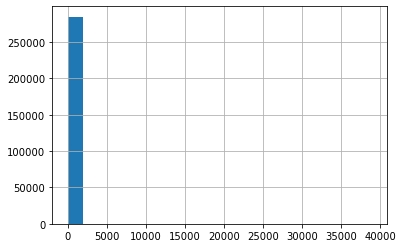

In [11]:
# Checking the target column
train.UnitPrice.hist(bins = 20)
plt.show()

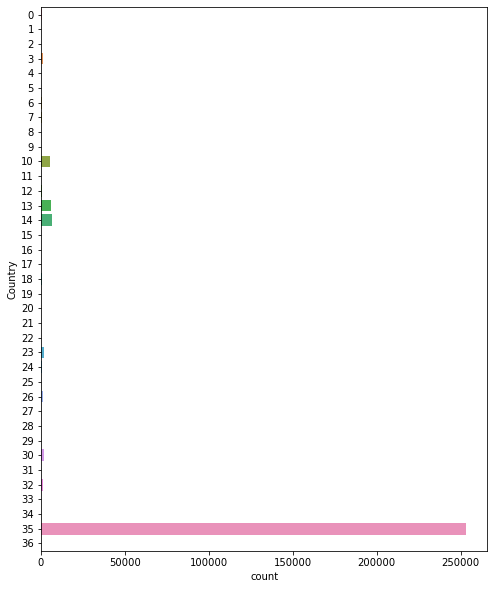

In [12]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y=train.Country)
plt.show()

In [13]:
# Filter out the top 5 countries
top5_countries = train.Country.value_counts().iloc[:5].index.tolist()
top5_countries

[35, 14, 13, 10, 30]

In [14]:
# CustomerID column
train.CustomerID.value_counts()

17841.0    5617
14911.0    4171
14096.0    3604
12748.0    3194
14606.0    1926
           ... 
15222.0       1
13270.0       1
16061.0       1
13106.0       1
17752.0       1
Name: CustomerID, Length: 4339, dtype: int64

In [15]:
# Filter out the top 5 customers
top5_customers = train.CustomerID.value_counts().iloc[:5].index.tolist()
top5_customers

[17841.0, 14911.0, 14096.0, 12748.0, 14606.0]

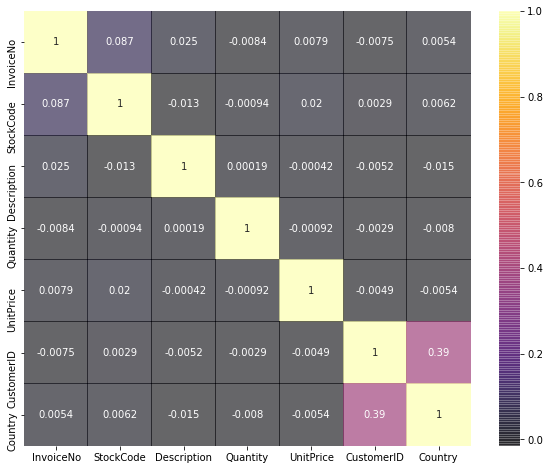

In [16]:
# Showing the correlation of target with other columns
fig = plt.figure(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, cmap="inferno", alpha=0.6, annot=True)
plt.show()

In [17]:
# Checking the correlation with only target column
corr["UnitPrice"]

InvoiceNo      0.007927
StockCode      0.020073
Description   -0.000424
Quantity      -0.000924
UnitPrice      1.000000
CustomerID    -0.004932
Country       -0.005378
Name: UnitPrice, dtype: float64

In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
train_report = sv.analyze(train)

#display the report
train_report.show_html('train.html')

In [ ]:
#analyzing the test dataset
test_report = sv.analyze(test)

#display the report
test_report.show_html('test.html')

# Data Pre-Processing

In [18]:
train['InvoiceDate']= pd.to_datetime(train['InvoiceDate'], errors='coerce')

In [19]:
train['day'] = train['InvoiceDate'].dt.day
train['month'] = train['InvoiceDate'].dt.month
train['year'] = train['InvoiceDate'].dt.year

In [20]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,5,2011
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,5,2011
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,11,2011
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,11,2011
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,5,2011


In [18]:
train = train.drop('InvoiceDate',axis = 1)

In [19]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
3,16971,2115,2983,1,0.83,15525.0,35
4,6080,1210,2886,12,1.65,13952.0,35


In [20]:
#Take targate variable into y
x = train.drop('UnitPrice',axis = 1)
y = train['UnitPrice']

In [21]:
x.shape

(284780, 6)

In [22]:
y.head()

0    3.75
1    1.95
2    5.95
3    0.83
4    1.65
Name: UnitPrice, dtype: float64

In [26]:
# Split data into train and test format
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [23]:
# Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 3)

In [24]:
model.fit(x,y)

RandomForestRegressor(n_estimators=500, random_state=3)

In [33]:
#test['day'] = test['InvoiceDate'].dt.day
#test['month'] = test['InvoiceDate'].dt.month
#test['year'] = test['InvoiceDate'].dt.year

In [35]:
test = test.drop('InvoiceDate',axis = 1)

In [36]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,day,month,year
0,3139,1709,1079,3,16161.0,35,22,2,2011
1,617,510,3457,1,17341.0,35,8,12,2010
2,14653,604,694,36,15158.0,35,25,10,2011
3,8634,1478,3473,2,16033.0,35,27,6,2011
4,15546,3216,871,1,15351.0,35,6,11,2011


In [48]:
y_pred = model.predict(test)

In [49]:
output = pd.DataFrame({'UnitPrice': y_pred})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,UnitPrice
0,1.65000
1,1.25484
2,3.63870
3,1.65000
4,12.75000
...,...
122044,0.41764
122045,1.69000
122046,1.27636
122047,3.93308


In [50]:
y_pred_train = model.predict(x)

In [51]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred_train)))

RMSE: 31.895222271823407


In [52]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y, y_pred_train), 2))

R2 score = 0.83


# Hyperparameter Tuning

In [28]:
# Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [29]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 116.1min


In [ ]:
print(gridF.best_params_)

In [ ]:
finalmodel = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
finalmodel.fit(x_train, y_train)

In [ ]:
y_pred_final = finalmodel.predict(x_test)

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred_final), 2))